In [31]:
import pandas as pd
import missingno as msno
import seaborn as sns

In [3]:
df=pd.read_csv("tech_salary_data.csv")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62642 non-null  object 
 1   company                  62637 non-null  object 
 2   level                    62519 non-null  object 
 3   title                    62642 non-null  object 
 4   totalyearlycompensation  62642 non-null  int64  
 5   location                 62642 non-null  object 
 6   yearsofexperience        62642 non-null  float64
 7   yearsatcompany           62642 non-null  float64
 8   tag                      61772 non-null  object 
 9   basesalary               62642 non-null  int64  
 10  stockgrantvalue          62642 non-null  float64
 11  bonus                    62642 non-null  float64
 12  gender                   43102 non-null  object 
 13  otherdetails             40134 non-null  object 
 14  cityid                

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000,...,7392,807.0,1,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0,...,7419,807.0,2,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000,...,11527,819.0,3,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000,...,7472,807.0,7,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0,...,7322,807.0,9,0,0,0,0,0,NaN,NaN


In [24]:
df.isnull().sum()

timestamp                      0
company                        5
level                        123
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
tag                          870
basesalary                     0
stockgrantvalue                0
bonus                          0
gender                     19540
otherdetails               22508
cityid                         0
dmaid                          2
rowNumber                      0
Masters_Degree                 0
Bachelors_Degree               0
Doctorate_Degree               0
Highschool                     0
Some_College                   0
Race                       40215
Education                  32272
dtype: int64

In [5]:
print(df['location'].unique())

['Redwood City, CA' 'San Francisco, CA' 'Seattle, WA' ...
 'Pasir Ris, SG, Singapore' 'Richmond, VA, United States' 'Hilbert, WI']


In [29]:
df.count()
df.sample(10)

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race,Education
31536,10/1/2020 10:13:33,Google,L4,Software Engineer,238000,"New York, NY",5.0,4.0,Web Development (Front-End),150000,...,10182,501.0,43498,0,1,0,0,0,White,Bachelor's Degree
21912,6/2/2020 0:08:19,Amazon,L6,Solution Architect,230000,"Los Angeles, CA",15.0,1.0,Database and Analytics,154000,...,7275,803.0,29923,0,0,0,0,0,NaN,NaN
44850,3/12/2021 20:52:04,Amazon,L5,Software Engineer,206000,"Nashville, TN",10.0,1.0,Full Stack,150000,...,10919,659.0,61336,1,0,0,0,0,White,Master's Degree
34829,11/8/2020 16:43:06,Amazon,L4,Software Engineer,101000,"Dublin, DN, Ireland",1.0,1.0,API Development (Back-End),79000,...,4015,0.0,47954,0,0,0,0,0,NaN,NaN
24710,7/22/2020 12:29:33,IBM,Staff Engineer,Hardware Engineer,100000,"Austin, TX",4.0,4.0,Hardware Development,100000,...,10965,635.0,33898,0,1,0,0,0,White,Bachelor's Degree
43708,3/2/2021 21:27:44,Amzon,L4,Software Engineer,138000,"Seattle, WA",0.0,0.0,API Development (Back-End),112000,...,11527,819.0,59830,1,0,0,0,0,NaN,Master's Degree
39297,1/13/2021 10:55:11,Walmart Labs,Software Engineer 3,Software Engineer,120000,"Bentonville, AR",2.0,2.0,Web Development (Front-End),98000,...,6924,670.0,53988,0,1,0,0,0,Asian,Bachelor's Degree
10275,8/31/2019 23:54:06,Stripe,L1,Software Engineer,223000,"San Francisco, CA",0.0,0.0,Distributed Systems (Back-End),129000,...,7419,807.0,13966,0,0,0,0,0,NaN,NaN
61692,8/16/2021 0:24:43,eBay,SE 3,Software Engineer,185000,"San Jose, CA",6.0,6.0,API Development (Back-End),158000,...,7422,807.0,83631,0,0,0,0,0,NaN,NaN
9537,8/10/2019 15:03:04,PayPal,T26,Software Engineering Manager,301000,"San Jose, CA",12.0,2.0,Full Stack,210000,...,7422,807.0,12966,0,0,0,0,0,NaN,NaN


<Axes: >

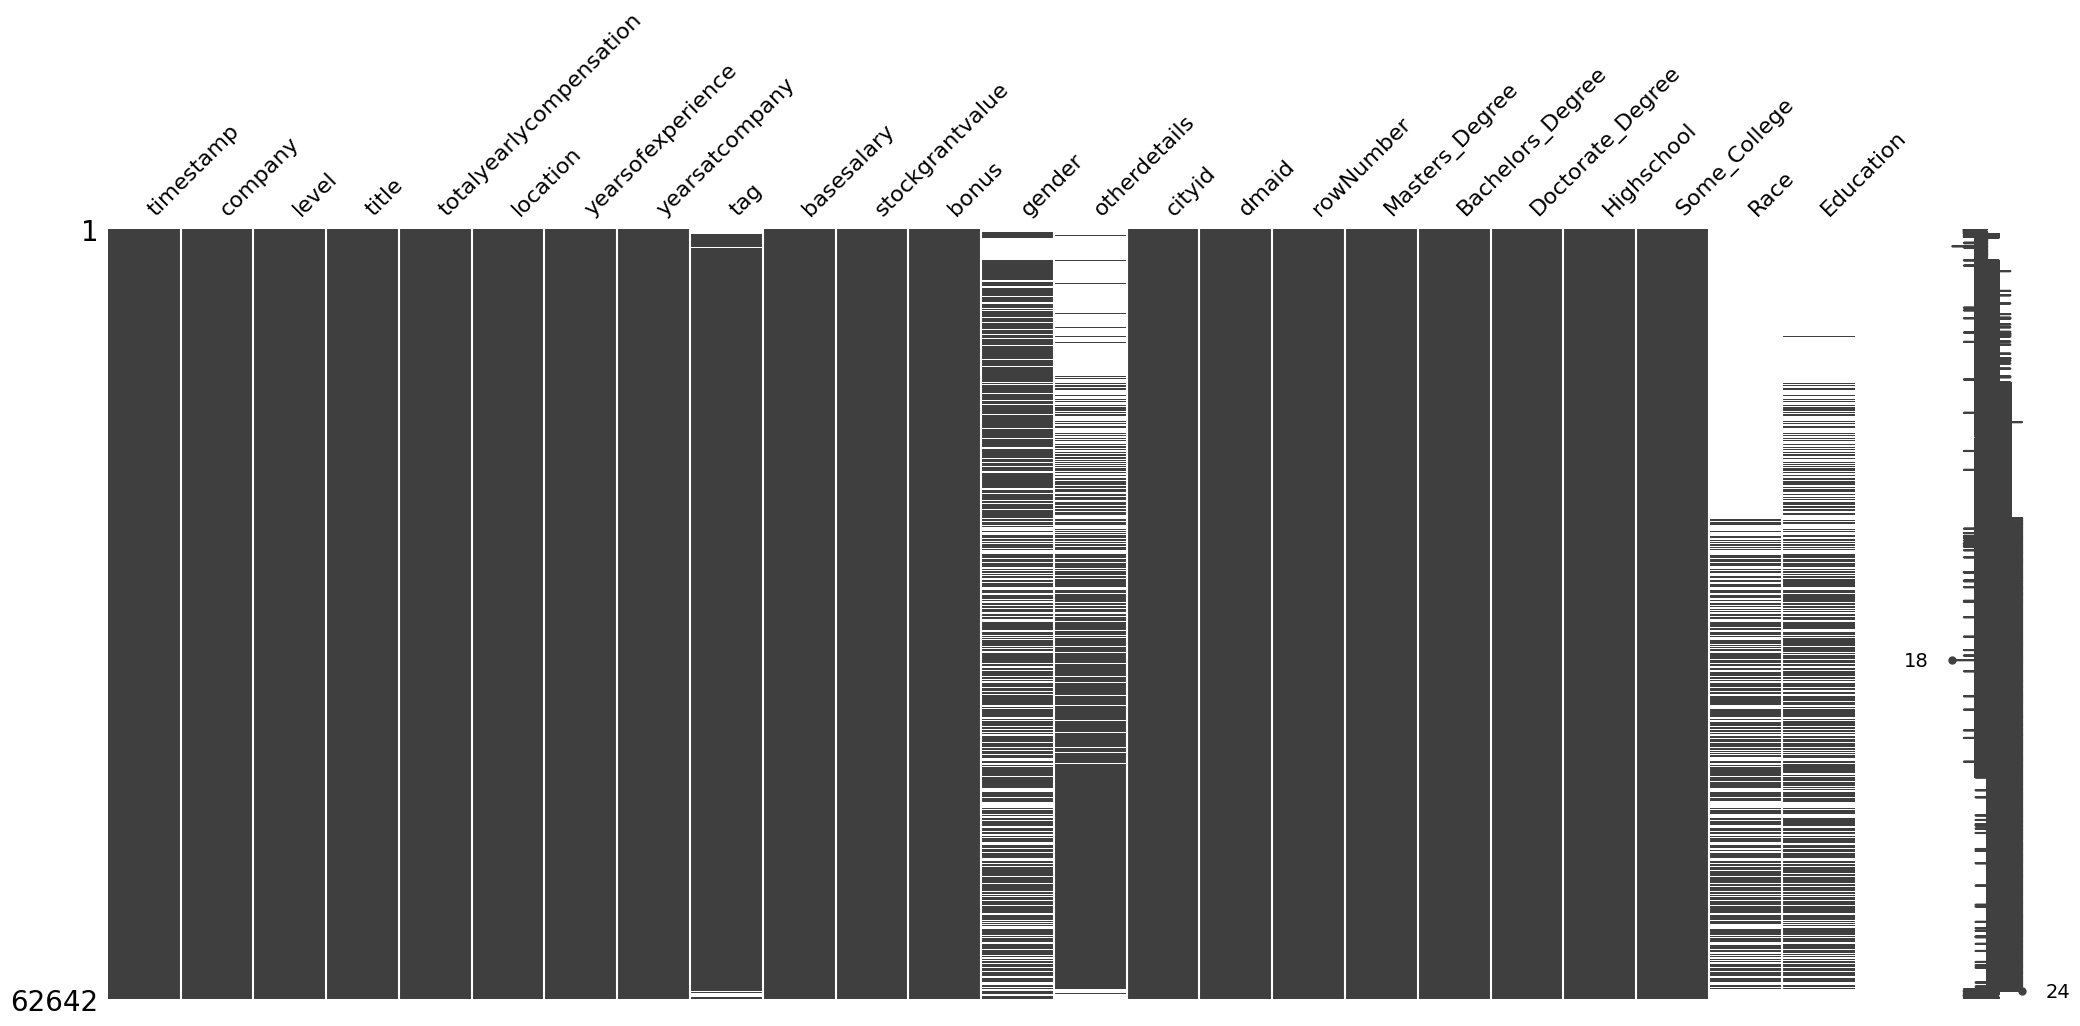

In [36]:

msno.matrix(df)

<Axes: >

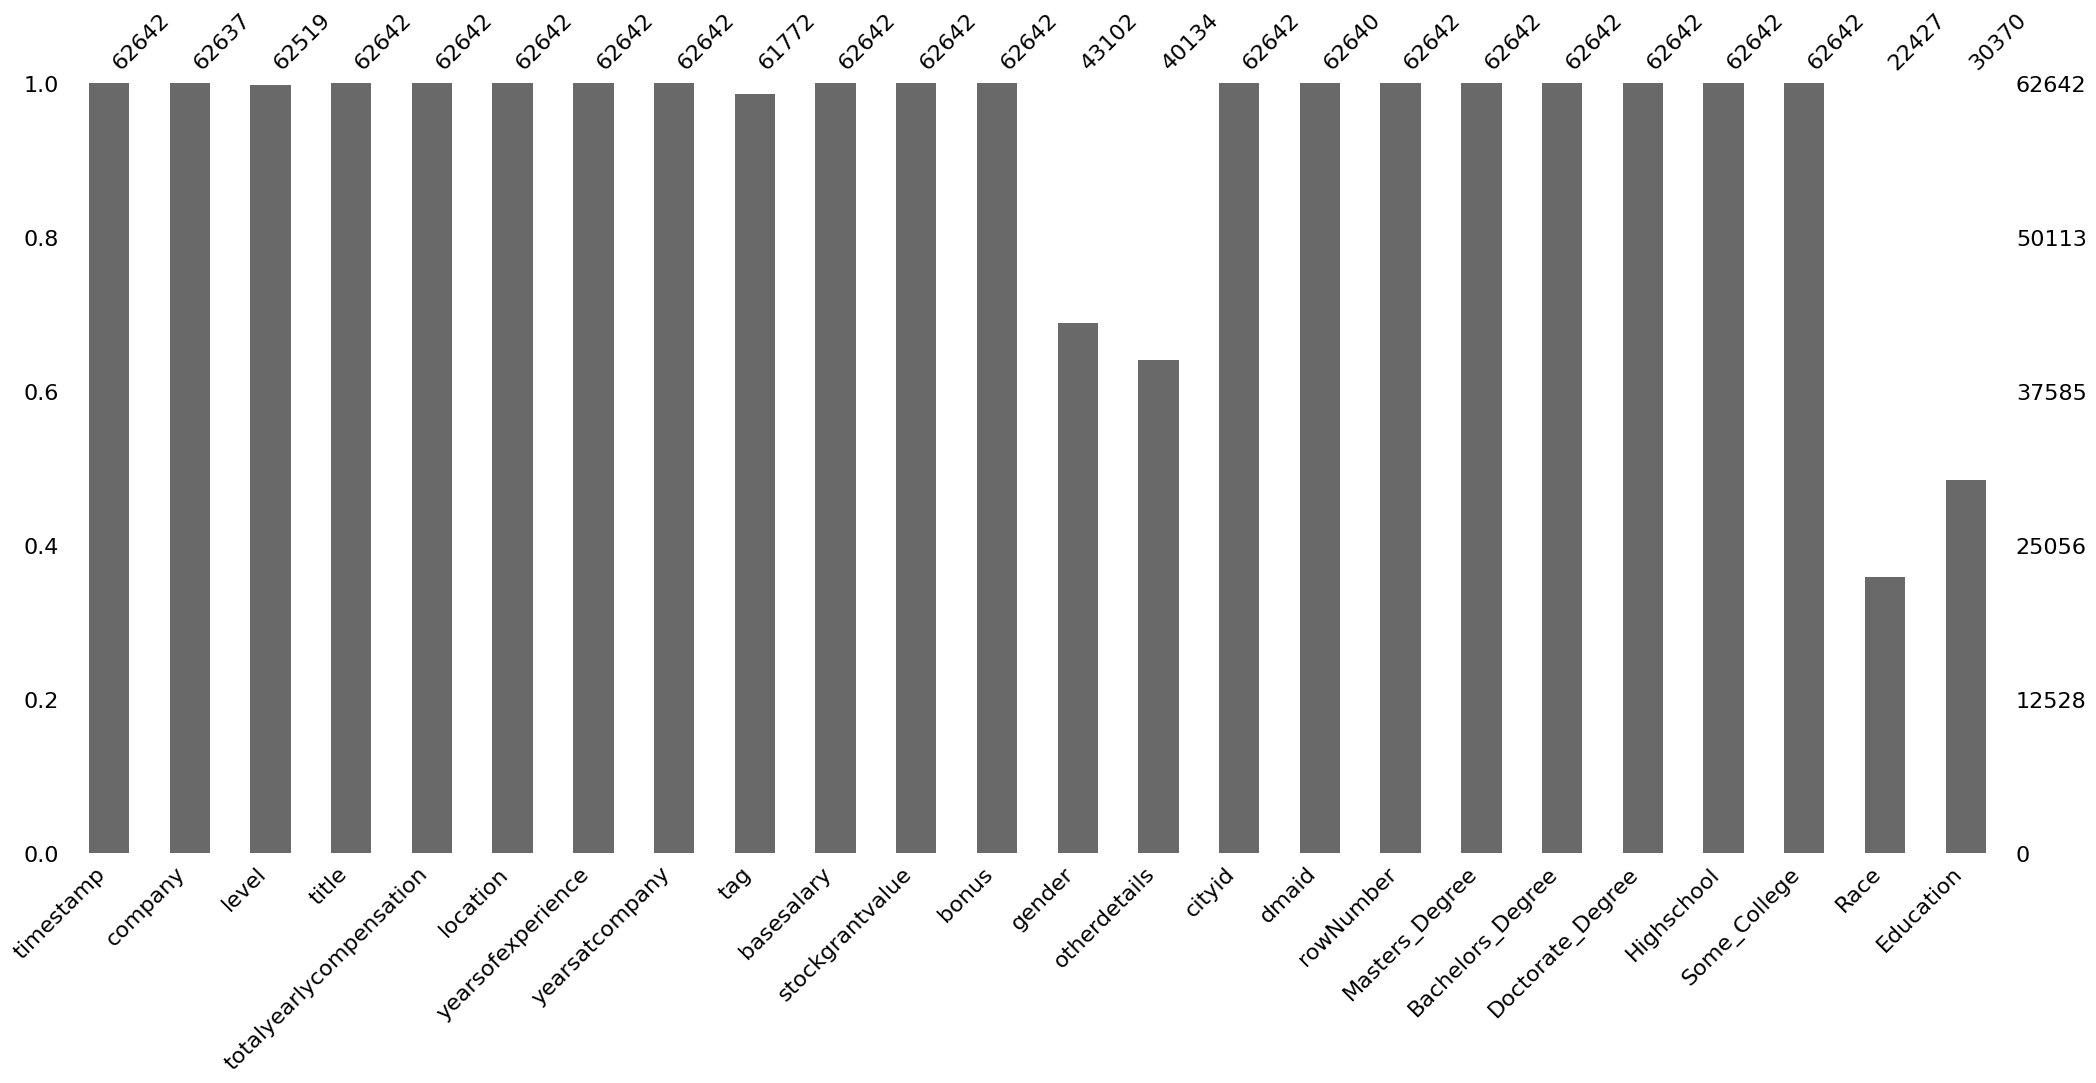

In [33]:
msno.bar(df)

<Axes: >

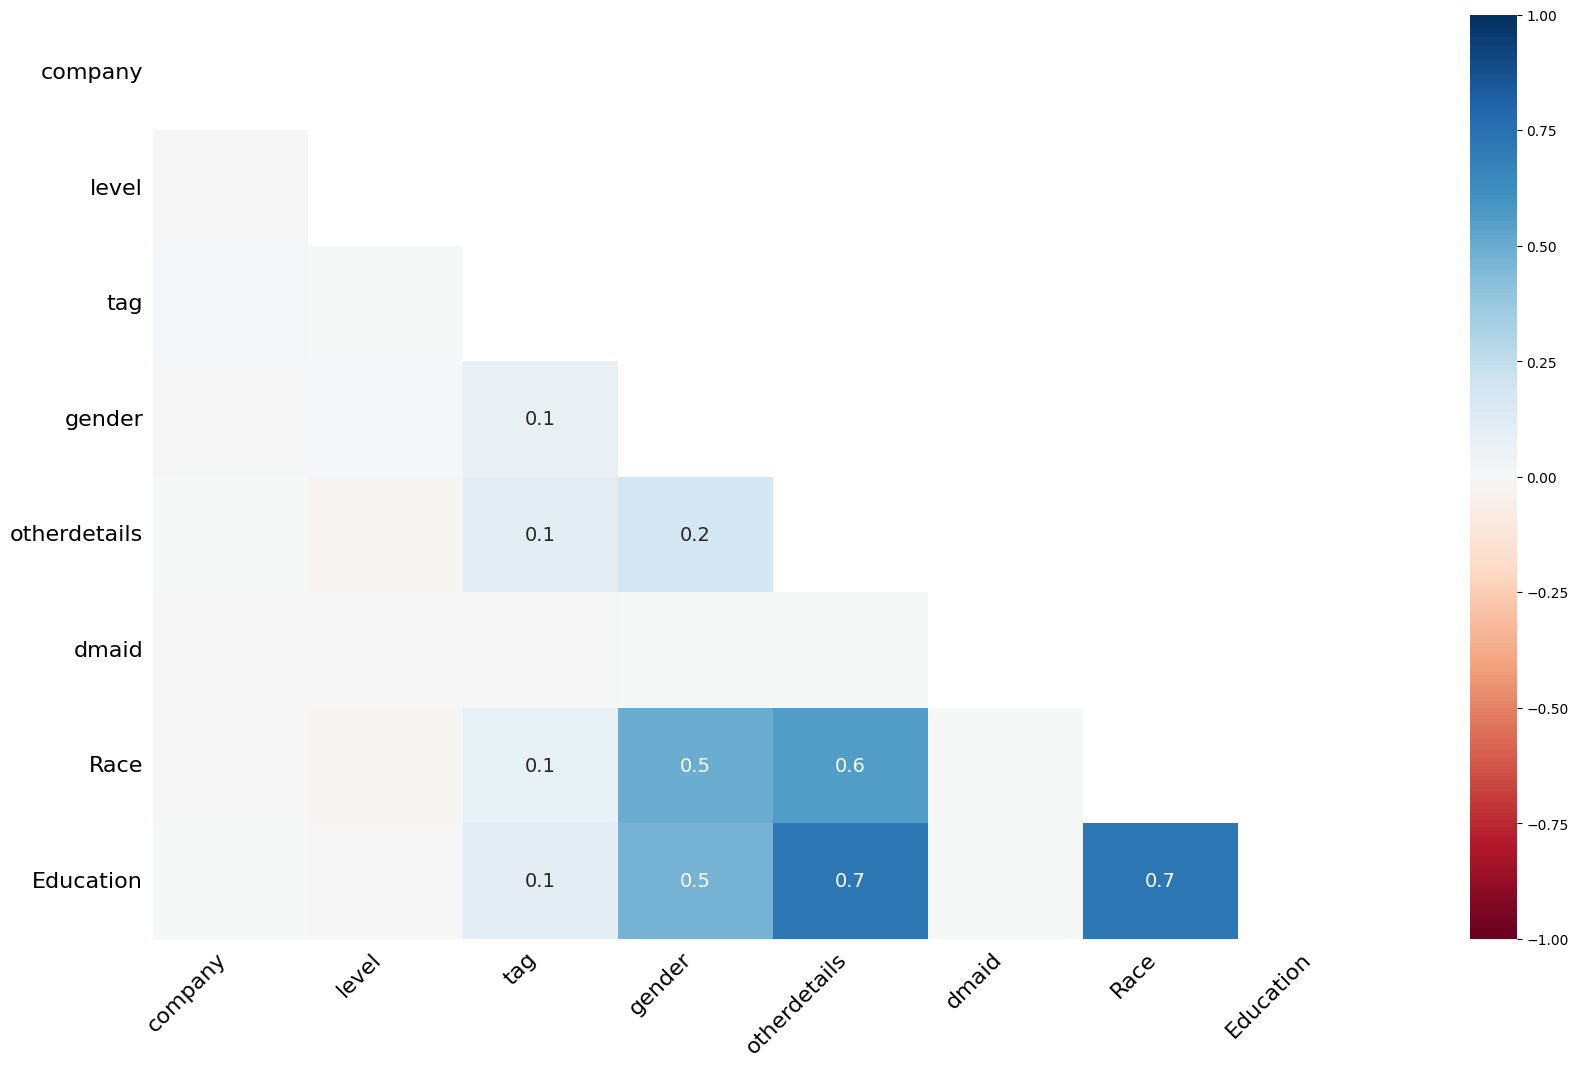

In [30]:
msno.heatmap(df)